In [19]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [21]:
#Cleaning process starts
path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles.csv"
df = pd.read_csv(path)
df["CRASH_DATE"]= pd.to_datetime(df["CRASH_DATE"])
start_date = '2017-09-01'
end_date = '2019-08-31'
mvc_data = df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date')
mvc_data.to_csv('/content/drive/MyDrive/MVC.csv')
df = pd.read_csv('/content/drive/MyDrive/MVC.csv')
df['CRASH_DATE'] = pd.to_datetime(df["CRASH_DATE"])
df['YEAR'], df['MONTH'] = df['CRASH_DATE'].dt.year, df['CRASH_DATE'].dt.month
df=df.dropna(subset=['VEHICLE_MAKE'])
def Clean_names(vehicle_name):
      if re.search('\-.*', vehicle_name):
          pos = re.search ('\-.*', vehicle_name).start()
          return vehicle_name[:pos]
      else:
          return vehicle_name
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].apply(Clean_names)
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].replace(to_replace = ('BMW ',' BMW'), value = 'BMW')
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].replace(to_replace = ('SUZI ',' SUZI'), value = 'SUZI')
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].replace(to_replace = ('TOYT ',' TOYT'), value = 'TOYT')
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].replace(to_replace = ('NISS ',' NISS'), value = 'NISS')
def para_mvc(VEHICLE_MAKE):
          if VEHICLE_MAKE in ["BMW","SUZI","TOYT","NISS"]:
            return VEHICLE_MAKE
          else:
            return np.NaN
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].apply(para_mvc)
df = df.dropna(subset=['VEHICLE_MAKE'])
df.to_csv('/content/drive/MyDrive/Vehicle_make_final.csv')
df = pd.read_csv('/content/drive/MyDrive/Vehicle_make_final.csv')
sample_data = df.sample(100, random_state=10221992)
sample_data
#cleaning process ends

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
104881,366766,2429208,18799540,4012385,2018-10-31,14:50,9170743a-018d-4e3e-8b60-790f81066cf5,NY,Sedan,BMW,...,Left Front Bumper,Left Front Bumper,Left Front Bumper,Left Front Bumper,N,NaN,Unspecified,Unspecified,2018,10
81808,285893,2314310,17896885,3896778,2018-05-08,11:57,8b431a7a-2b3b-4d5e-b361-e57b4a927111,NY,Sedan,NISS,...,Left Rear Bumper,No Damage,No Damage,No Damage,N,NaN,Backing Unsafely,Unspecified,2018,5
213869,746648,2970597,17957160,3777973,2017-10-27,15:00,2ecc9539-c9e0-4c83-9573-deac7699e2cc,NY,Sedan,TOYT,...,Right Front Bumper,NaN,NaN,NaN,N,NaN,Brakes Defective,Following Too Closely,2017,10
242012,843930,3108505,17762686,3854267,2018-02-27,16:29,33faa5ba-1781-4041-9acb-a2b7dc5a04bf,MI,Station Wagon/Sport Utility Vehicle,TOYT,...,Left Side Doors,Left Side Doors,Left Front Quarter Panel,NaN,N,NaN,Unspecified,Unspecified,2018,2
70520,246526,2258204,18785515,4013615,2018-11-03,8:30,c89b04f7-adc9-4610-a1d3-7040e9bb5197,NY,Sedan,TOYT,...,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,Passing or Lane Usage Improper,Unspecified,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120092,419721,2504694,17675396,3821594,2018-01-03,6:40,b11463f3-5221-4f4b-b6fc-bb01c549ae72,NY,Sedan,NISS,...,Other,NaN,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Turning Improperly,2018,1
60340,210737,2207210,17919326,3782357,2017-11-02,20:00,c0e9dcc4-ac9c-4215-b274-3ff61d1fa0c9,NY,Sedan,TOYT,...,Center Back End,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2017,11
54791,190971,2179130,17724233,3857445,2018-03-02,15:53,ec9726c9-a3b5-46d0-9516-93767a7a233f,NJ,Sedan,TOYT,...,Center Front End,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2018,3
43606,152388,2124189,18756702,3925126,2018-06-20,20:46,7a953d36-d1a3-4a6e-bec8-03b620422baf,NY,Station Wagon/Sport Utility Vehicle,NISS,...,Left Rear Bumper,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2018,6


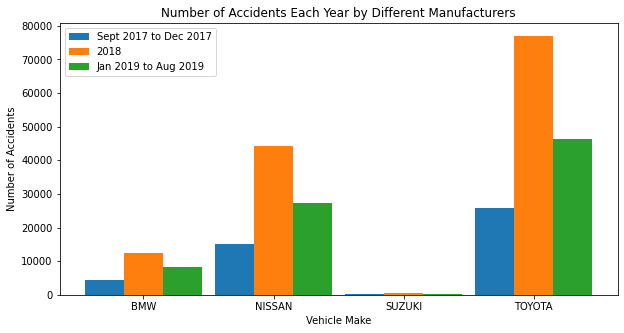

In [22]:
#Analysis Query 1 starts
df1 = df.groupby(["VEHICLE_MAKE","YEAR"]).count()
df1.rename(columns = {'Unnamed: 0':'COUNT'}, inplace = True)
df1 = df1.iloc[:,:1]
df1['COUNT'].to_csv('/content/drive/MyDrive/YEAR_COUNT.csv')
df1 = pd.read_csv('/content/drive/MyDrive/YEAR_COUNT.csv')

X = ['BMW','NISSAN','SUZUKI','TOYOTA']
plt.figure(figsize=(10,5))

No_accidents_2017 = list(df1.loc[0:9:3,'COUNT'])
No_accidents_2018 = list(df1.loc[1:10:3,'COUNT'])
No_accidents_2019 = list(df1.loc[2:11:3,'COUNT'])

x_axis = np.arange(len(X))

plt.bar(x_axis -0.3,No_accidents_2017, 0.3, label='Sept 2017 to Dec 2017')
plt.bar(x_axis +0,No_accidents_2018, 0.3, label='2018')
plt.bar(x_axis +0.3,No_accidents_2019, 0.3, label='Jan 2019 to Aug 2019')

plt.xticks(x_axis, X)
plt.title("Number of Accidents Each Year by Different Manufacturers")
plt.xlabel("Vehicle Make")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()
#Analysis Query 1 ends

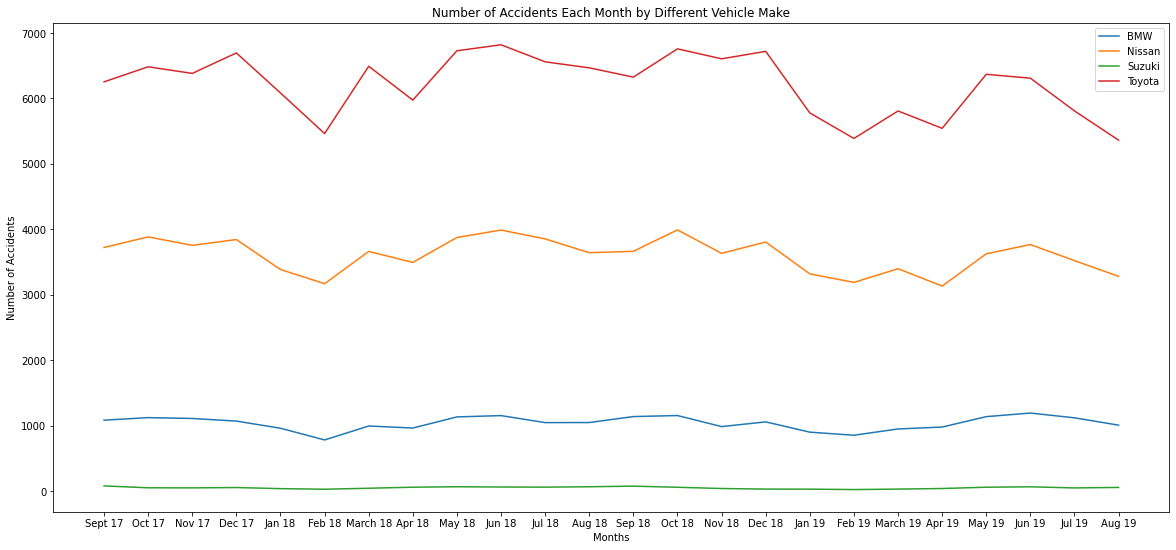

In [23]:
#Analysis Query 2 starts
df2 = df.groupby(["VEHICLE_MAKE","YEAR","MONTH"]).count()
df2.rename(columns = {'Unnamed: 0':'COUNT'}, inplace = True)
df2 = df2.iloc[:,:1]
df2['COUNT'].to_csv('/content/drive/MyDrive/MONTH_COUNT.csv')
df2 = pd.read_csv('/content/drive/MyDrive/MONTH_COUNT.csv') 
# df5 = df5.reset_index()

plt.figure(figsize=(20,9)) 
X = ['Sept 17','Oct 17','Nov 17','Dec 17','Jan 18','Feb 18','March 18','Apr 18','May 18','Jun 18','Jul 18','Aug 18','Sep 18','Oct 18','Nov 18','Dec 18','Jan 19','Feb 19','March 19','Apr 19','May 19','Jun 19','Jul 19','Aug 19']
No_accidents_bmw = list(df2.loc[0:23:1,'COUNT'])
No_accidents_niss = list(df2.loc[24:47:1,'COUNT'])
No_accidents_suzi = list(df2.loc[48:71:1,'COUNT'])
No_accidents_toyt = list(df2.loc[72:95:1,'COUNT'])

plt.plot(X , No_accidents_bmw , label = 'BMW')
plt.plot(X , No_accidents_niss , label = 'Nissan')
plt.plot(X , No_accidents_suzi , label = 'Suzuki')
plt.plot(X , No_accidents_toyt , label = 'Toyota')

plt.title("Number of Accidents Each Month by Different Vehicle Make")
plt.xlabel("Months")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()
#Analysis Query 2 ends

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

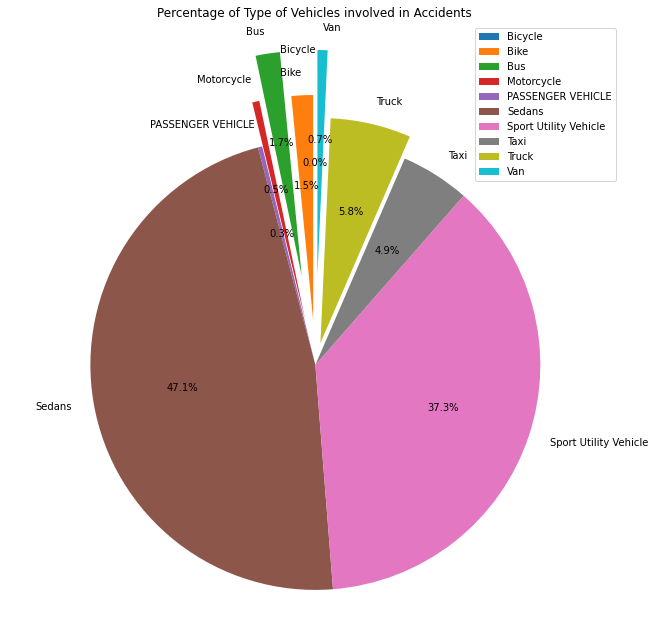

In [24]:
#Analysis Query 3 Starts
df3 = pd.read_csv('/content/drive/MyDrive/MVC.csv')
df3 = df3.dropna(subset=['VEHICLE_TYPE'])
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('4 dr sedan','Sedan','2 dr sedan'), value = 'Sedans')
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('Pick-up Truck','Box Truck','Box T','BOX T','box t'), value = 'Truck')
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('Station Wagon/Sport Utility Vehicle','SPORT UTILITY / STATION WAGON'), value = 'Sport Utility Vehicle')
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('TAXI'), value = 'Taxi')
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('VAN'), value = 'Van')
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('BICYC','Minicycle'), value = 'Bicycle')
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].replace(to_replace = ('PASS','PAS','pas','PASSE','Pas','LIMO','LIMOU','Convertible'),value = 'PASSENGER VEHICLE')
def para_vt(VEHICLE_TYPE):
          if VEHICLE_TYPE in ['Sedans','Truck','Sport Utility Vehicle','PASSENGER VEHICLE','Van','Bike','Bus','Bicycle','Taxi','Motorcycle']:
            return VEHICLE_TYPE
          else:
            return np.NaN
df3['VEHICLE_TYPE'] = df3['VEHICLE_TYPE'].apply(para_vt)
df3 = df3.dropna(subset=['VEHICLE_TYPE'])
df3.to_csv('/content/drive/MyDrive/Vehicle_type_final.csv')
df3 = df3.groupby(["VEHICLE_TYPE"]).count()
df3.rename(columns = {'Unnamed: 0':'COUNT'}, inplace = True)
df3 = df3.iloc[:,:1]
df3.to_csv('/content/drive/MyDrive/Vehicle_type_count.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Vehicle_type_count.csv')

Data = list(df3.loc[::1,'COUNT'])
Label = list(df3.loc[::1,'VEHICLE_TYPE'])
ex=(0.3,.2,.4,.2,0,0,0,0,.1,.4)
plt.figure(figsize=(11,11))

plt.pie(Data, labels = Label, autopct = '%1.1f%%', explode = ex,shadow = None, startangle = 90)
plt.title("Percentage of Type of Vehicles involved in Accidents")
plt.axis('equal')
plt.legend()
plt.plot
#Analysis Query 3 ends